In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_df_merged.csv")

In [3]:
x = df.head()
x

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,valence,tempo,duration_ms,time_signature,year,release_date,release_date_parsed,duration_min,total_grammy_awards,total_grammy_nominations
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,Testify,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.503,117.906,210133,4.0,1999,1999-11-02,1999-11-02,3.502217,0.0,0.0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,Guerrilla Radio,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.489,103.680,206200,4.0,1999,1999-11-02,1999-11-02,3.436667,0.0,0.0
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,Calm Like a Bomb,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.370,149.749,298893,4.0,1999,1999-11-02,1999-11-02,4.981550,0.0,0.0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,Mic Check,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.574,96.752,213640,4.0,1999,1999-11-02,1999-11-02,3.560667,0.0,0.0
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,Sleep Now In the Fire,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.539,127.059,205600,4.0,1999,1999-11-02,1999-11-02,3.426667,0.0,0.0


In [4]:
x.to_csv("head.csv", index = False)

In [5]:
# Calculate summary statistics for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
summary_stats = df[num_cols].describe().T

# Display the summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max
track_number,1204028.0,7.656335,5.994979,1.000000,3.000000,7.000000,10.0000,5.000000e+01
disc_number,1204028.0,1.055906,0.295375,1.000000,1.000000,1.000000,1.0000,1.300000e+01
danceability,1204028.0,0.493057,0.189670,0.000000,0.356000,0.501000,0.6330,1.000000e+00
energy,1204028.0,0.509537,0.294684,0.000000,0.252000,0.524000,0.7660,1.000000e+00
key,1204028.0,5.194152,3.536730,0.000000,2.000000,5.000000,8.0000,1.100000e+01
loudness,1204028.0,-11.808687,6.982131,-60.000000,-15.254000,-9.791000,-6.7170,7.234000e+00
speechiness,1204028.0,0.084382,0.115991,0.000000,0.035100,0.044600,0.0723,9.690000e-01
acousticness,1204028.0,0.446751,0.385201,0.000000,0.037600,0.389000,0.8610,9.960000e-01
instrumentalness,1204028.0,0.282860,0.376284,0.000000,0.000008,0.008080,0.7190,1.000000e+00
liveness,1204028.0,0.201599,0.180459,0.000000,0.096800,0.125000,0.2450,1.000000e+00


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

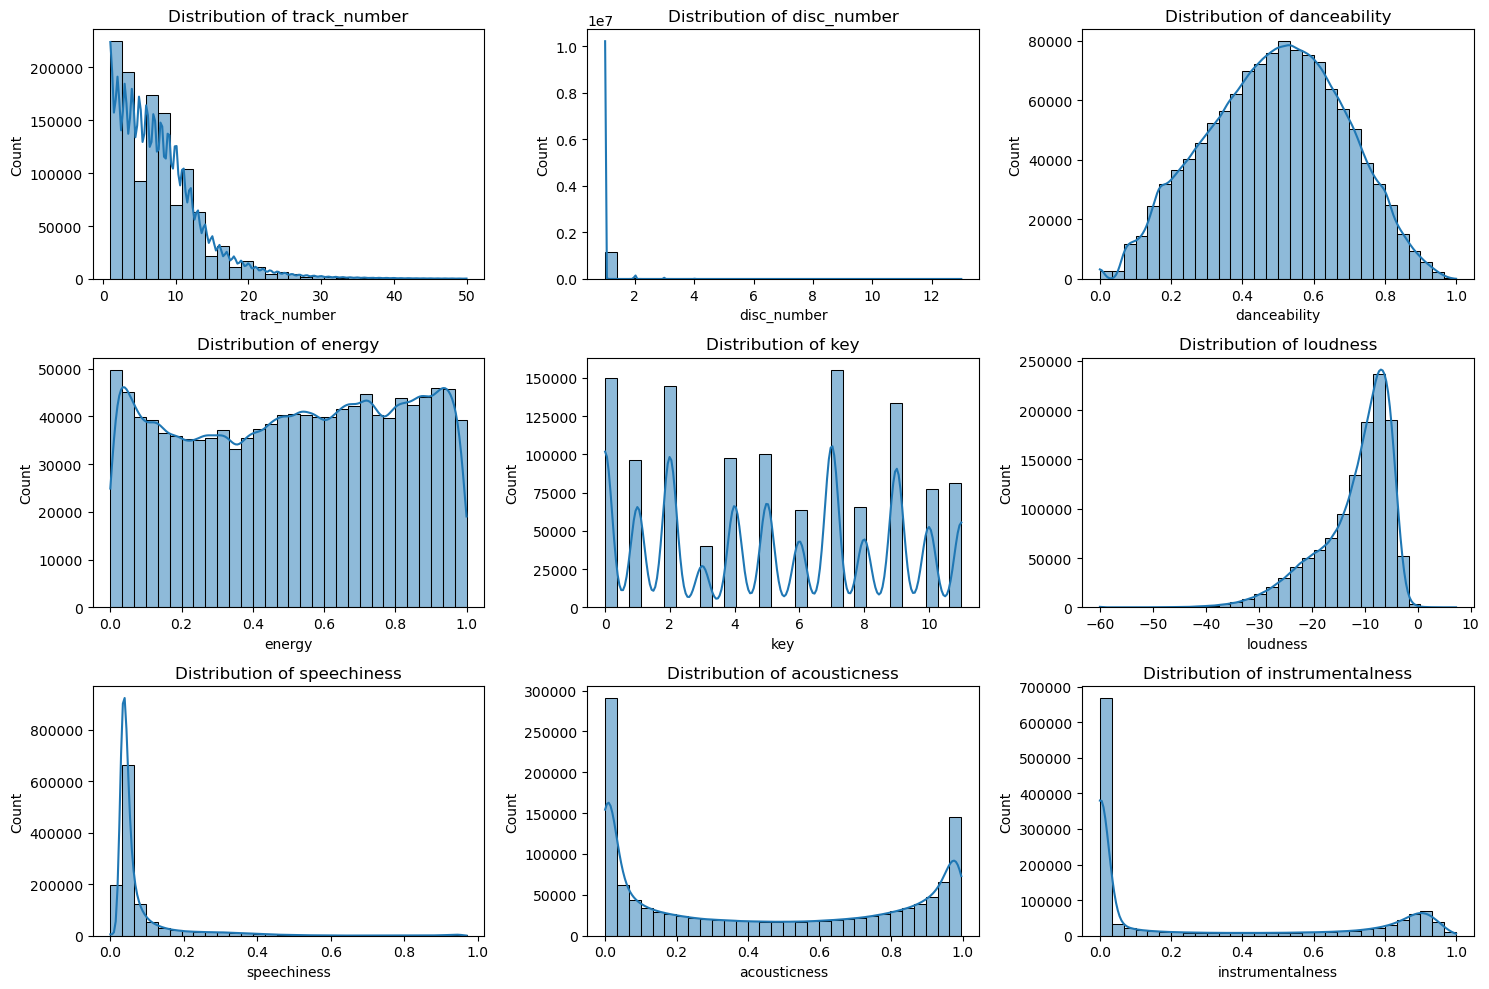

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

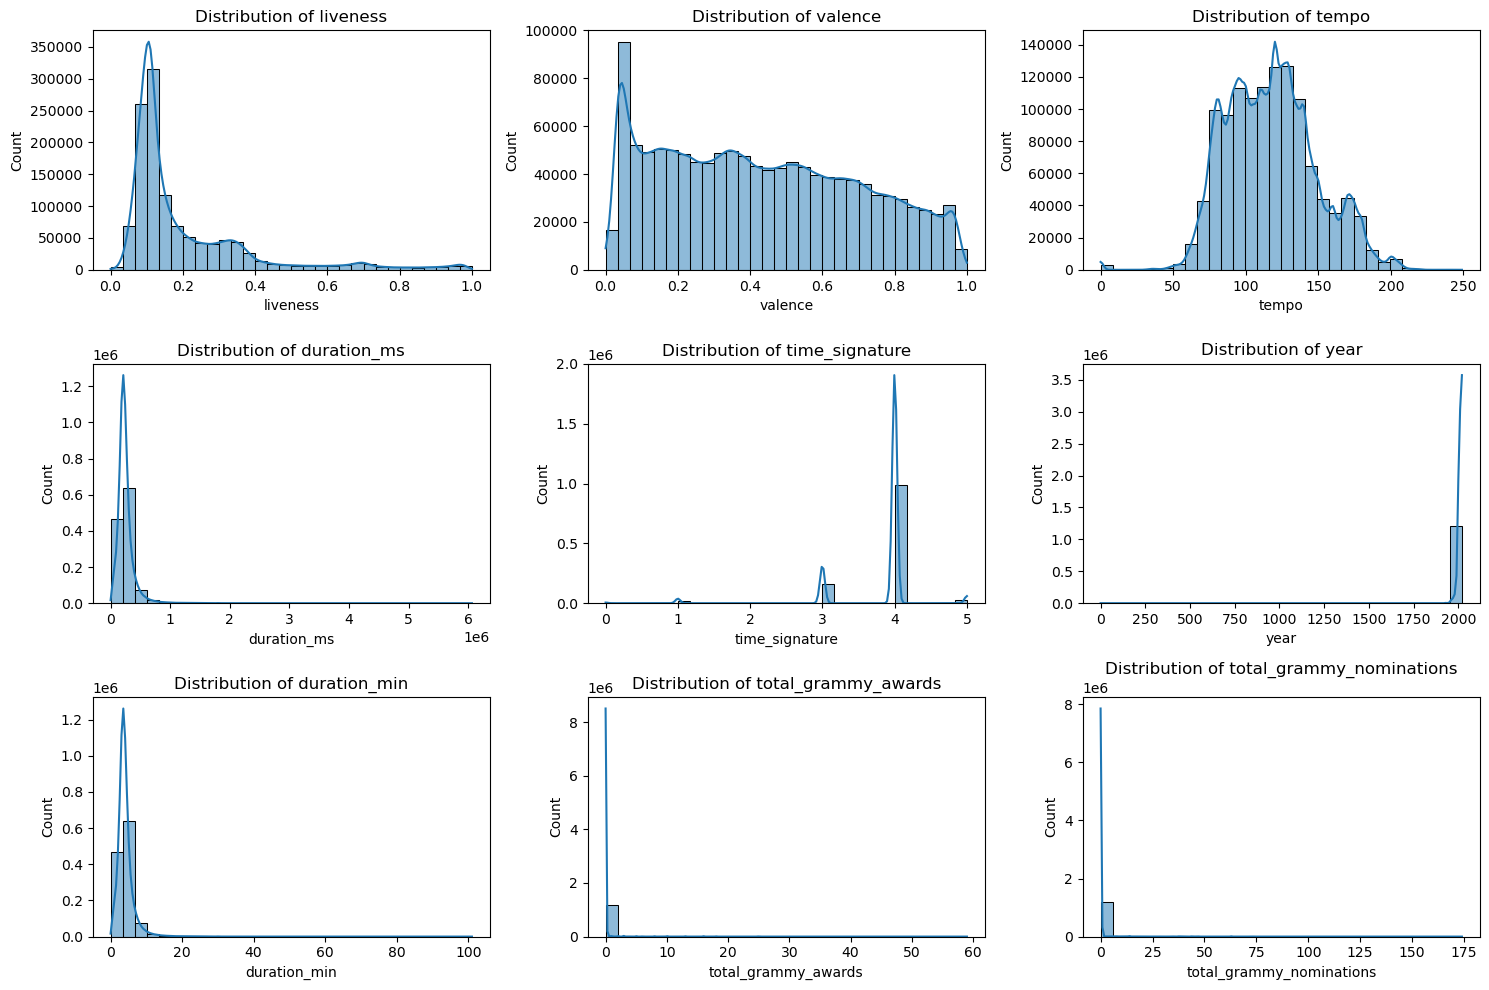

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_plots = len(num_cols)
plots_per_figure = 9 
num_figures = math.ceil(num_plots / plots_per_figure)
for fig_num in range(num_figures):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes = axes.flatten() 
    
    start_idx = fig_num * plots_per_figure
    end_idx = min(start_idx + plots_per_figure, num_plots)
    
    for i, col in enumerate(num_cols[start_idx:end_idx]):
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


# Refined Data Transformation Strategy:

### 1️⃣ No Transformation (Raw Values Retained)
   - Certain features contain meaningful categorical or ordinal values and should remain unchanged:
     - Total Grammy Awards, Total Grammy Nominations → Small values are expected; no transformation needed.
     - Year → Represents time; keeping the raw format is meaningful.
     - Time Signature, Key, Disc Number → Categorical or ordinal in nature, better left unchanged.

### 2️⃣ Standardization (Z-score normalization)
   - Applied to features that typically follow a normal-like distribution to maintain their standard deviations:
     - Danceability, Energy, Loudness → Standardized to improve comparability across different scales.

### 3️⃣ Min-Max Scaling (Preserves Proportion)
   - Used for features that naturally range between 0 and 1 or have meaningful upper and lower bounds:
     - Tempo → Speed of music; normalizing between 0-1 keeps relative differences.
     - Valence → Emotional positivity of a song, already between 0-1.
     - Liveness → Probability-based score, already within a limited range.

### 4️⃣ Log Transformation (Right-Skewed Data)
   - Applied to features with a highly skewed distribution to reduce extreme values:
     - Track Number, Speechiness, Instrumentalness, Duration (ms & min) → Have a long right tail.

### 5️⃣ Yeo-Johnson Transformation (Handles Skewness and Negative Values)
   - Used for features that may contain both positive and negative values or have irregular distributions:
     - Acousticness → Ranges from 0 to 1 but has an irregular distribution.
     - Liveness → Similar to Acousticness but can be more evenly transformed.

By applying these transformations strategically, we ensure the dataset is more suitable for statistical modeling while preserving its interpretability and real-world significance.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import numpy as np

df_transformed = df.copy()

# Standardization (Z-score normalization) for normally distributed columns
standardization_cols = ['danceability', 'energy', 'loudness']
scaler_standard = StandardScaler()
df_transformed[standardization_cols] = scaler_standard.fit_transform(df[standardization_cols])

# Min-Max Scaling for features that should retain proportion
normalization_cols = ['tempo', 'valence', 'liveness']
scaler_minmax = MinMaxScaler()
df_transformed[normalization_cols] = scaler_minmax.fit_transform(df[normalization_cols])

# Log Transformation for highly right-skewed distributions
log_transform_cols = ['track_number', 'speechiness', 'instrumentalness', 'duration_ms', 'duration_min']
for col in log_transform_cols:
    df_transformed[col] = np.log1p(df[col])  # log1p helps handle zeros

# Yeo-Johnson Transformation for mixed-distribution features
yeojohnson_cols = ['acousticness']
power_transformer_yeojohnson = PowerTransformer(method='yeo-johnson')
df_transformed[yeojohnson_cols] = power_transformer_yeojohnson.fit_transform(df[yeojohnson_cols])

# No transformation for meaningful count-based features
no_transform_cols = ['total_grammy_awards', 'total_grammy_nominations', 'year', 'time_signature', 'key']
df_transformed[no_transform_cols] = df[no_transform_cols]  # Keep them as they are

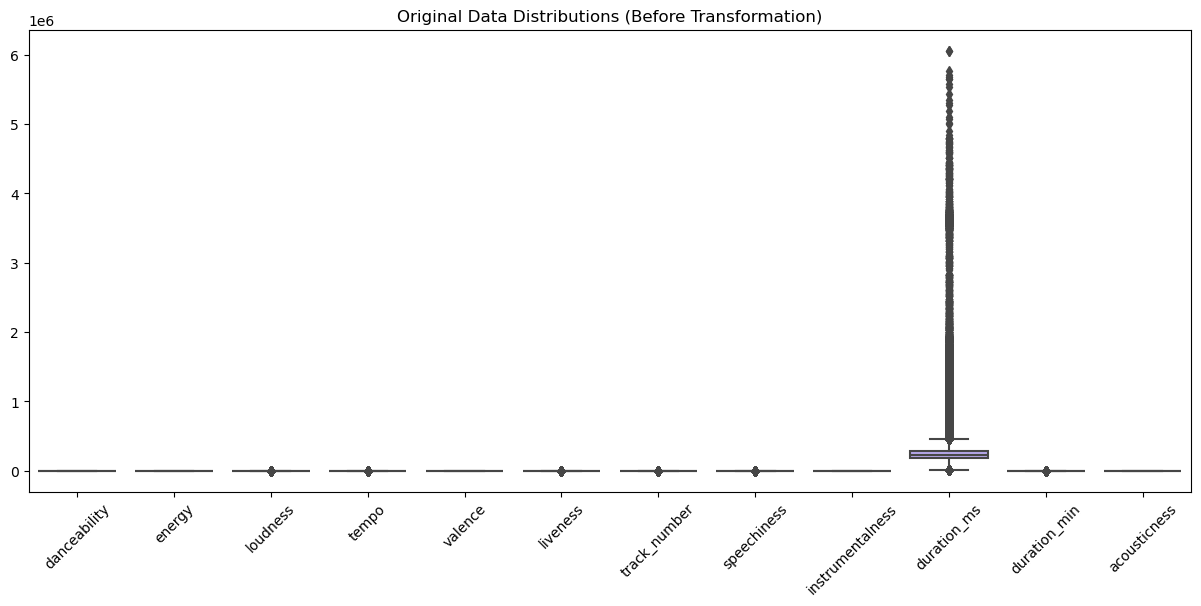

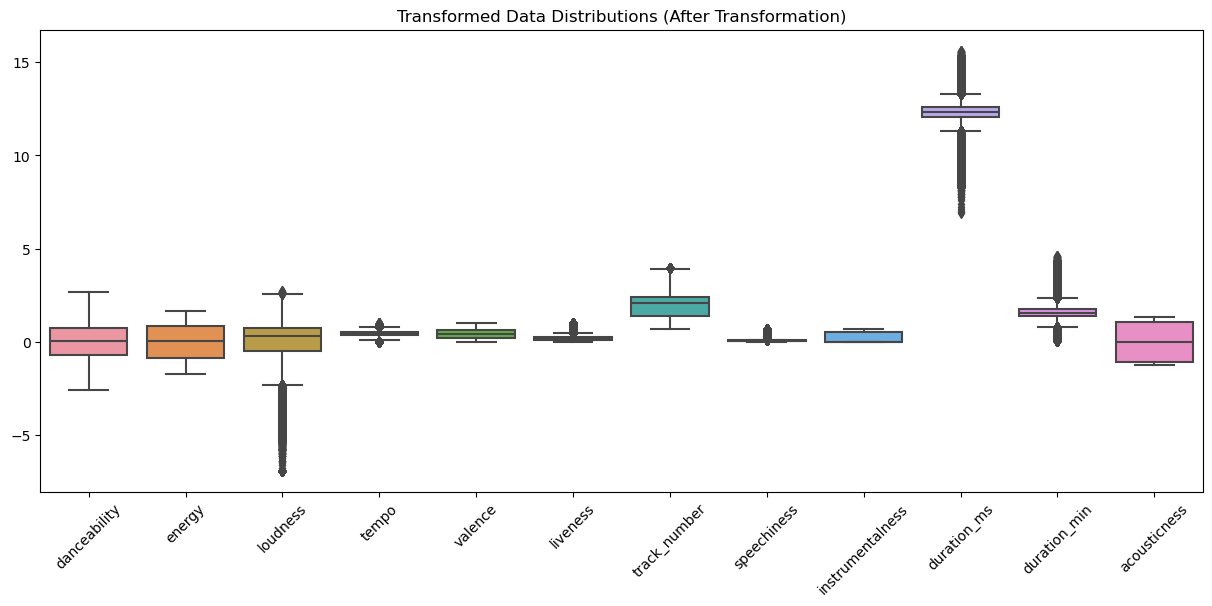

In [8]:
transformed_features = standardization_cols + normalization_cols + log_transform_cols + yeojohnson_cols

# Plot boxplots for original vs transformed data
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[transformed_features])
plt.title("Original Data Distributions (Before Transformation)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_transformed[transformed_features])
plt.title("Transformed Data Distributions (After Transformation)")
plt.xticks(rotation=45)
plt.show()

In [9]:
df_transformed.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,valence,tempo,duration_ms,time_signature,year,release_date,release_date_parsed,duration_min,total_grammy_awards,total_grammy_nominations
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,Testify,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],0.693147,1,False,-0.121564,...,0.503,0.473644,12.255501,4.0,1999,1999-11-02,1999-11-02,1.504570,0.0,0.0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,Guerrilla Radio,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.098612,1,True,0.558567,...,0.489,0.416496,12.236607,4.0,1999,1999-11-02,1999-11-02,1.489903,0.0,0.0
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,Calm Like a Bomb,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.386294,1,False,-0.938775,...,0.370,0.601561,12.607844,4.0,1999,1999-11-02,1999-11-02,1.788680,0.0,0.0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,Mic Check,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.609438,1,True,-0.279734,...,0.574,0.388665,12.272052,4.0,1999,1999-11-02,1999-11-02,1.517469,0.0,0.0
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,Sleep Now In the Fire,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.791759,1,False,-0.353547,...,0.539,0.510412,12.233693,4.0,1999,1999-11-02,1999-11-02,1.487647,0.0,0.0
